In [72]:
import numpy as np
import matplotlib.pyplot as plt
def Display(data, lineType, label='', done = False, xLabel=None, yLabel=None, plotLabel=None, f=None, log=False, save=False, show=True):
    """ Displays data as [x, y]"""
    t = np.arange(0, 4, 0.01)
    
    plt.plot(data[0], data[1], lineType, label=label)
    if (done):
        if f != None:
            plt.plot(t, f(t, 1), 'k', label='Exact')
        if log:
            plt.xscale("log")
            plt.yscale("log")
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        plt.legend(loc='best')
        plt.tight_layout()
        if save:
            plt.savefig('{0}.pdf'.format(plotLabel))
        if show:
            plt.show()

## Get Data from Excel

In [73]:
MedCyl   = np.loadtxt('MedCyl.csv'  ,unpack=True,delimiter=',')
LongCyl  = np.loadtxt('LongCyl.csv' ,unpack=True,delimiter=',')
Sphere   = np.loadtxt('Sphere.csv'  ,unpack=True,delimiter=',')
Baseball = np.loadtxt('Baseball.csv',unpack=True,delimiter=',')
Cone30   = np.loadtxt('30Cone.csv'  ,unpack=True,delimiter=',')
Cone90   = np.loadtxt('90Cone.csv'  ,unpack=True,delimiter=',')
AllShapes = [MedCyl, LongCyl, Sphere, Baseball, Cone30, Cone90]
ShapeNames = ['Medium Cylinder', 'Long Cylinder', 'Sphere', 'Baseball', r'30$^{\circ}$ Cone', r'90$^{\circ}$ Cone']

In [74]:
# Get the average for each velocity and force
def GetAverages(Shape):
    newShape = []
    for j in range(6):
        Row1 = np.average([Shape[j][i] for i in np.arange(0, len(Shape[j]), 3)])
        Row2 = np.average([Shape[j][i] for i in np.arange(1, len(Shape[j]), 3)])
        Row3 = np.average([Shape[j][i] for i in np.arange(2, len(Shape[j]), 3)])
        newShape.append([Row1, Row2, Row3])
    return newShape
        

## Drag Force V velocity (1, 0)

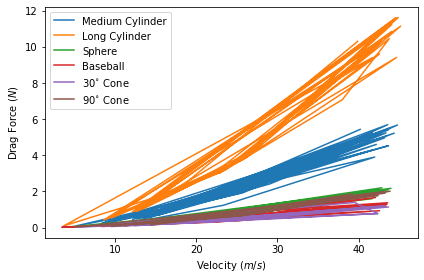

In [75]:
for i in range(len(AllShapes)-1):
    Display([AllShapes[i][0], AllShapes[i][1]], '-', label=ShapeNames[i])
Display([AllShapes[-1][0], AllShapes[-1][1]], '-', label=ShapeNames[-1],
        done=True, xLabel=r'Velocity $(m/s)$', yLabel=r'Drag Force $(N)$', plotLabel='DragVVelocityNo')

Not that great, so I will pass that data into GetAverages()

In [76]:
# for i in AllShapes:
    # print(GetAverages(i))
GetAverages(AllShapes[0]) #Checking one, each row should be averages

[[11.630588235294118, 24.446470588235297, 42.55117647058824],
 [0.4384, 1.860670588235294, 4.979941176470588],
 [19.952941176470592, 19.952941176470592, 19.952941176470592],
 [84.88235294117646, 84.88235294117646, 84.88235294117646],
 [32388.235294117647, 68058.82352941176, 118470.58823529411],
 [0.8120570205882354, 0.8023255294117647, 0.7105338441176471]]

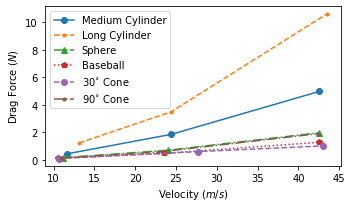

In [77]:
plt.figure(figsize=(5,3))
lineTypes = ['o-', '.--', '^-.', 'p:', 'o--', '.-.']
for i in range(len(AllShapes)-1):
    Display([GetAverages(AllShapes[i])[0], GetAverages(AllShapes[i])[1]], lineTypes[i], label=ShapeNames[i])
Display([GetAverages(AllShapes[-1])[0], GetAverages(AllShapes[-1])[1]], lineTypes[-1], label=ShapeNames[-1],
        done=True, xLabel=r'Velocity $(m/s)$', yLabel=r'Drag Force $(N)$', plotLabel='DragVVelocity', save=True)

Drag force with respect to velocity of fluid measured for 6 different object shapes. Averages of each previous semester were taken for three trials each. Force should be related to velocity squared and this plot behaves favorably with that prediction.

# Coefficient of Drag Versus Reynolds Number

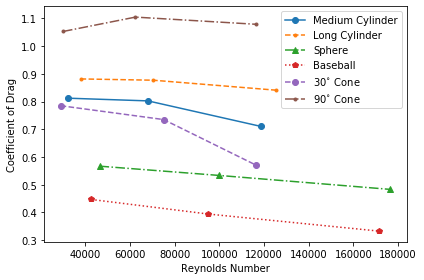

In [78]:
# plt.figure(figsize=(5,3))
lineTypes = ['o-', '.--', '^-.', 'p:', 'o--', '.-.']
for i in range(len(AllShapes)-1):
    Display([GetAverages(AllShapes[i])[4], GetAverages(AllShapes[i])[5]], lineTypes[i], label=ShapeNames[i])
Display([GetAverages(AllShapes[-1])[4], GetAverages(AllShapes[-1])[5]], lineTypes[-1], label=ShapeNames[-1],
        done=True, xLabel='Reynolds Number', yLabel='Coefficient of Drag', plotLabel='ReVCd', save=True)

Coefficients of drag plotted with the reynolds number for six different shapes. Averages of three different trials were used to condense the information. In general, as the reynolds number increases, the coefficients of drag decrease. The 90 \dgr cone has the largest coefficient of drag, while the baseball has the lowest. This is due to the larger recirculation zone behind the cone,as well as the laces tripping the boundary layer in the baseball causing it to have a small recirculation zone.

# Error Versus Re

Accepted Values

|Shape          |Cd  |
|---------------|----|
|Med Cy         |0.73|
|Long Cyl       |0.8 |
|Sphere         |0.45|
|Baseball       |0.3 |
|30 deg Cone    |0.5 |
|90 deg Cone    |1.15|

In [79]:
# Need to get the average Cd for each shape
AccCds = [0.73, 0.8, 0.45, 0.3, 0.5, 1.15]
AllCds = []
for i in AllShapes:
    AllCds.append(np.average(i[5]))
AllCds

[0.774972131372549,
 0.8664611788095238,
 0.5278385052380953,
 0.3912722433333333,
 0.6965976553333333,
 1.07861685]

In [80]:
def GetError(i):
    Cds = GetAverages(AllShapes[i])[5]       # Gets the coefficient of drag
    AV = AllCds[i]                           # Accepted Value for coefficient
    Errors = [abs(AV-i)/AV*100 for i in Cds] # Calculates the error
    return Errors

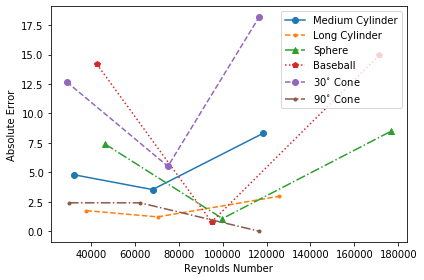

In [81]:
# plt.figure(figsize=(5,3))
lineTypes = ['o-', '.--', '^-.', 'p:', 'o--', '.-.']
for i in range(len(AllShapes)-1):
    Display([GetAverages(AllShapes[i])[4], GetError(i)], lineTypes[i], label=ShapeNames[i])
Display([GetAverages(AllShapes[-1])[4], GetError(-1)], lineTypes[-1], label=ShapeNames[-1],
        done=True, xLabel=r'Reynolds Number', yLabel=r'Absolute Error', plotLabel='ErrosVRe1', save=True)

Absolute error between calculated coefficient of drag and accepted values, plotted against reynolds number. The average for each of three trials across multiple semesters was taken to provide three data points for each of six shapes. The second trial usually had the lowest error and ocurred between reynolds numbers of 60,000 and 100,000. As the reynolds increases after that, the accepted value and calculated value differ more.

### Alternatively, these are the single averages for each shape

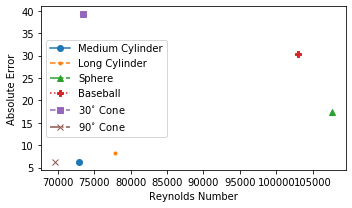

In [82]:
Error = [abs(i-j)/i*100 for i, j in zip(AccCds, AllCds)]
plt.figure(figsize=(5,3))
lineTypes = ['o-', '.--', '^-.', 'P:', 's--', 'x-.']
for i in range(len(AllShapes)-1):
    Display([np.average(AllShapes[i][4]), Error[i]], lineTypes[i], label=ShapeNames[i])
Display([np.average(AllShapes[-1][4]), Error[-1]], lineTypes[-1], label=ShapeNames[-1],
        done=True, xLabel=r'Reynolds Number', yLabel=r'Absolute Error', plotLabel='ErrosVRe2', save=True)